DATASET BAN ĐẦU -> UNSUPERVISED LEARNING -> GIẢM CHIỀU

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('../DatasetUL.csv')

In [18]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,dbscan_cluster,dbscan_outlier,gmm_prob_0,gmm_prob_1,gmm_prob_2
0,2,0,1,2,0,0,0,224,2017,10,...,0,0,65.00,0,1,0,0,3.040454e-14,1.0,0.0
1,2,0,2,3,3,0,0,5,2018,11,...,0,0,106.68,1,1,-1,1,2.803105e-16,1.0,0.0
2,1,0,2,1,0,0,0,1,2018,2,...,0,0,60.00,0,0,1,0,4.622906e-11,1.0,0.0
3,2,0,0,2,0,0,0,211,2018,5,...,0,0,100.00,0,0,2,0,1.015229e-11,1.0,0.0
4,2,0,1,1,3,0,0,48,2018,4,...,0,0,94.50,0,0,-1,1,5.874644e-16,1.0,0.0


Phân tách các đặc trưng và biến mục tiêu

In [19]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

Chuẩn hóa dữ liệu

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Giảm chiều với PCA

In [21]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

* Gộp lại thành DataFrame với cột booking_status

In [22]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['booking_status'] = y.values

Lưu dataset mới

In [23]:
df_pca.to_csv('../DatasetULDR.csv', index=False)
print("Đã lưu file 'DatasetULDR.csv' sau khi giảm chiều với PCA.")

Đã lưu file 'DatasetULDR.csv' sau khi giảm chiều với PCA.


Trực quan hóa dữ liệu sau PCA

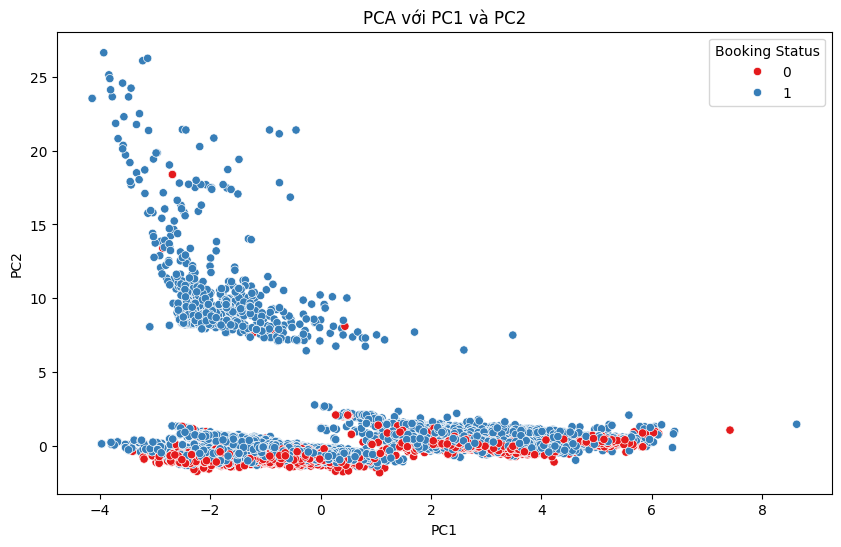

In [24]:
df_loaded = pd.read_csv('../DatasetULDR.csv')
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_loaded, x='PC1', y='PC2', hue='booking_status', palette='Set1')
plt.title('PCA với PC1 và PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Booking Status')
plt.show()